## fNIRS Recording inspection

In this notebook, we look in depth at the details of the computation of fNIRS coherence, from asserting the quality of signals to the continous wavelet transform.

In [14]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd

In [15]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import hypyp
import hypyp.fnirs as fnirs

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


In [16]:
file_path = "../data/NIRS/slow_breathing.snirf"
print(file_path)

../data/NIRS/slow_breathing.snirf


In [17]:
# First load as is to inspect the signal and montage

rec_cw_amplitude = fnirs.Recording().load_file(file_path)
rec_cw_amplitude.mne_raw.info

Measurement date,"September 19, 2025 15:48:37 GMT"
Experimenter,Unknown
Participant,pfortin
Digitized points,300 points
Good channels,102 fNIRS (CW amplitude)
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,5.09 Hz
Highpass,0.00 Hz
Lowpass,2.54 Hz


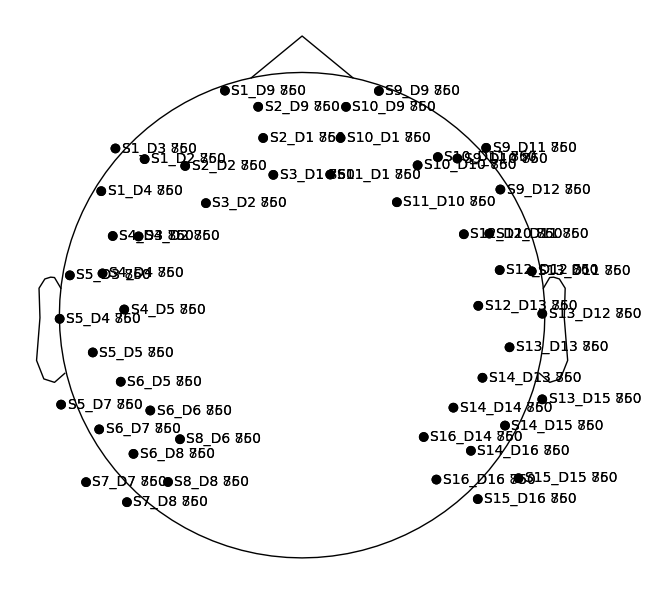

In [18]:
_ = rec_cw_amplitude.mne_raw.plot_sensors(show_names=True)

In [19]:
rec_cw_amplitude.get_channel_to_standard_montage_map()

,Source/Detector,Standard 1020,Distance
0,S1,AF7,0.007714
1,S2,AF3,0.005826
2,S3,F1,0.005018
3,S4,FC5,0.005597
4,S5,T7,0.007003
...,...,...,...
78,S14_D16,P6,0.016766
79,S15_D15,TP8,0.015748
80,S15_D16,P8,0.012631
81,S16_D14,P4,0.017612


**Since the Continuous Wavelet Transform are computed only when the Wavelet Transform Coherence is required, let's create a dyad with the same recording and compute intra-subject coherence**


In [22]:
wavelet = hypyp.wavelet.ComplexMorletWavelet(frequency_range=(0.1, 2))
wtc = fnirs.Dyad(rec_cw_amplitude, rec_cw_amplitude).compute_wtcs(ch_match='760', wavelet=wavelet)



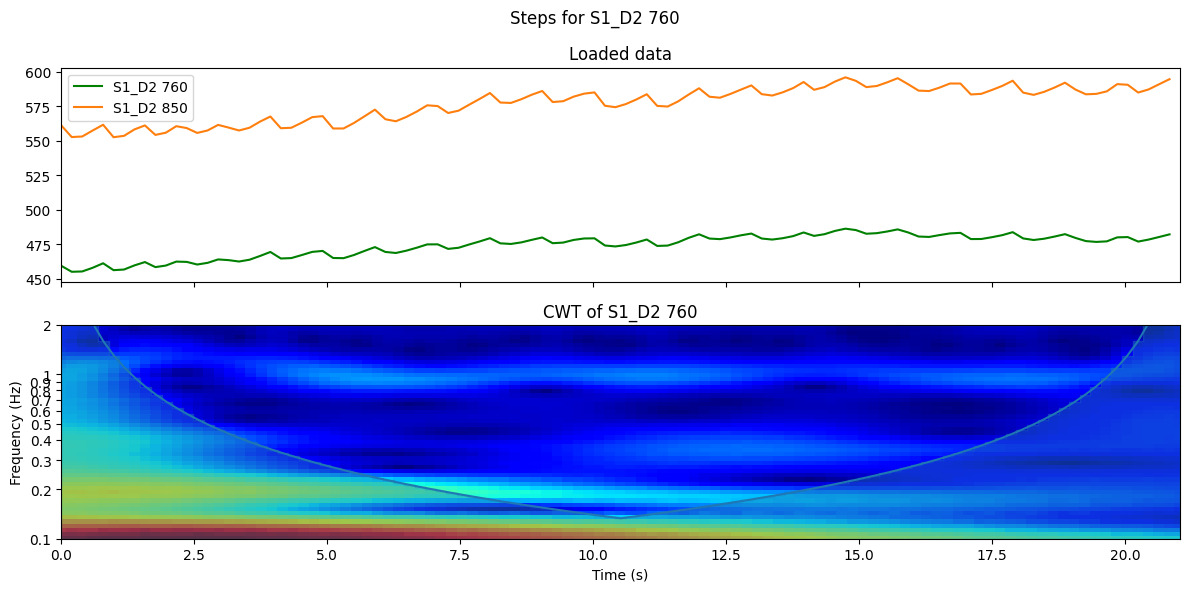

In [23]:

_ = rec_cw_amplitude.plot_steps_for_channel(rec_cw_amplitude.mne_raw.ch_names[0])

In [24]:

rec_haemo = fnirs.Recording().load_file(file_path, preprocessor=fnirs.MnePreprocessorRawToHaemo())

In [25]:
wavelet = hypyp.wavelet.ComplexMorletWavelet(frequency_range=(0.1, 2))
wtc = fnirs.Dyad(rec_haemo, rec_haemo).compute_wtcs(ch_match='hbo', wavelet=wavelet)

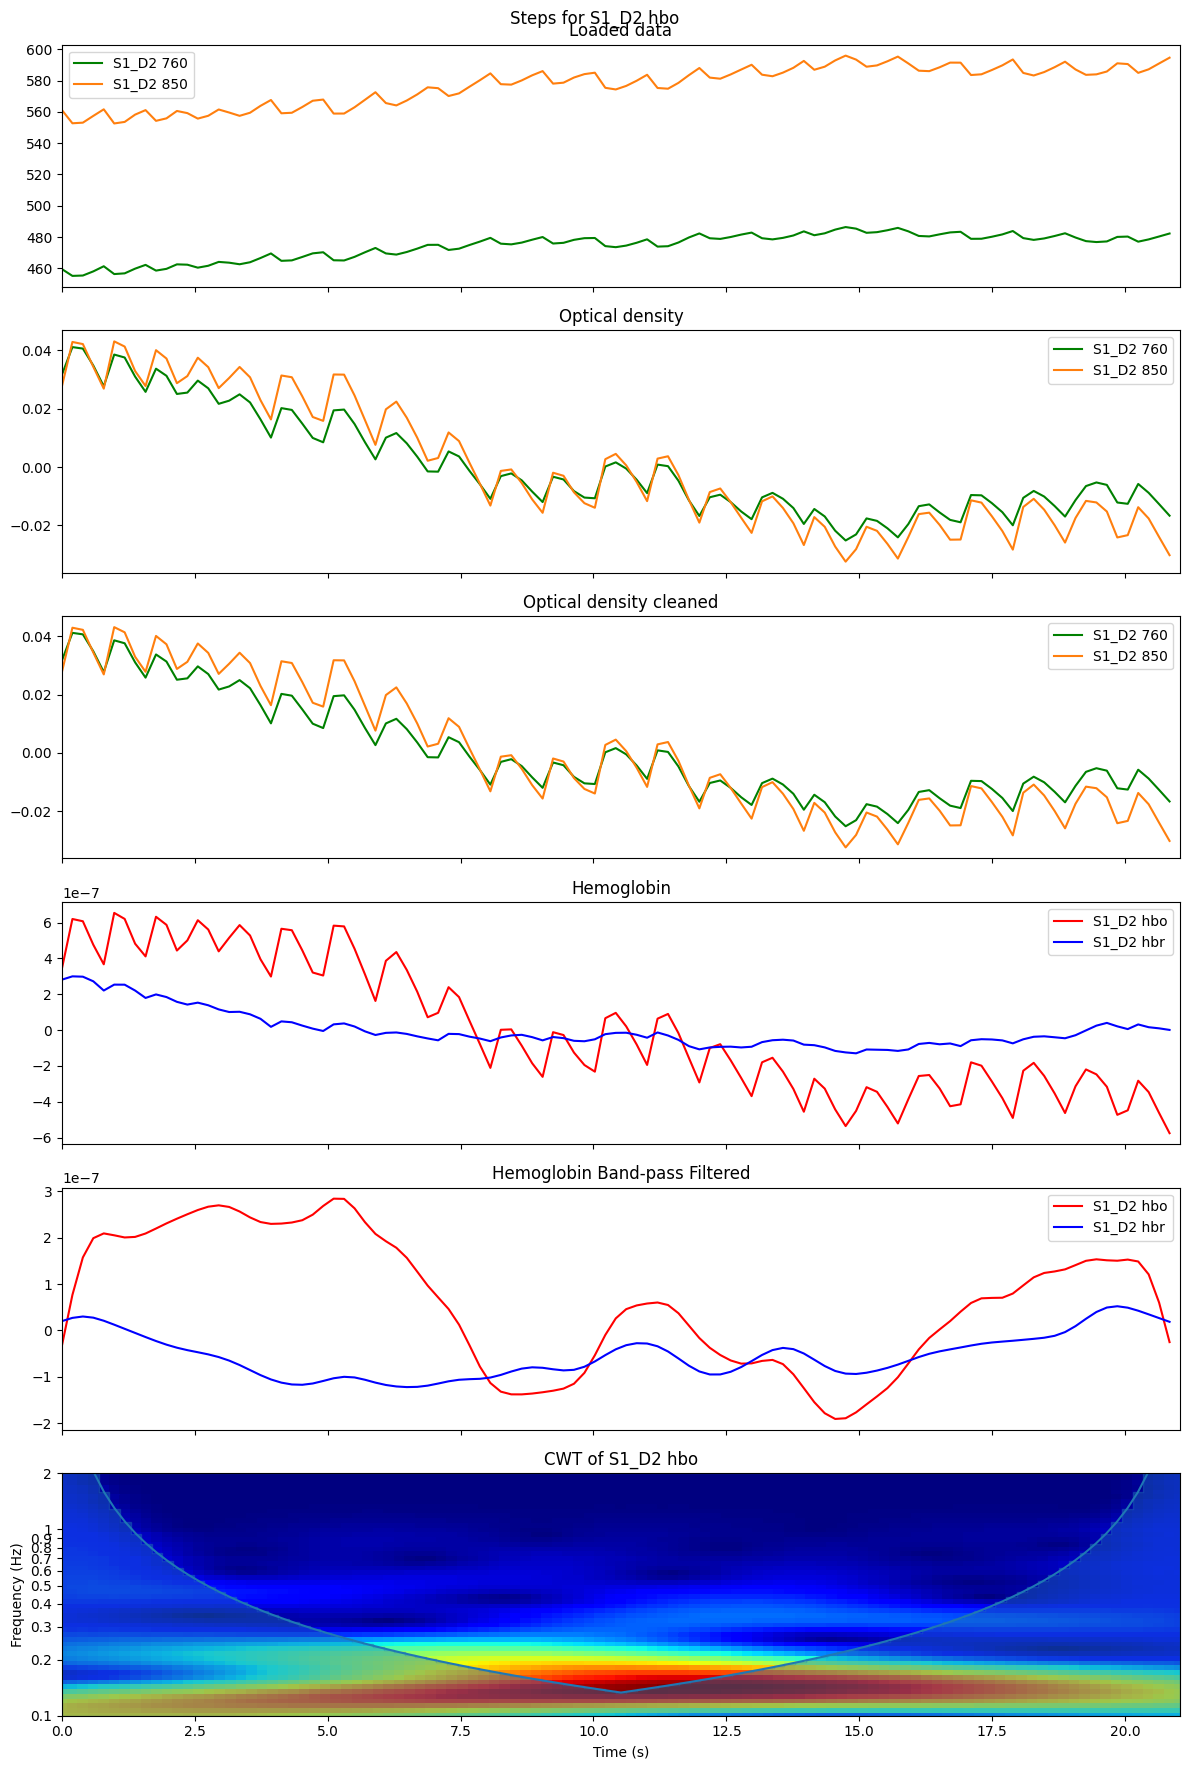

In [26]:
_ = rec_haemo.plot_steps_for_channel(rec_haemo.mne_preprocessed.ch_names[0])


In [12]:
# Save all to png files, both CWT of amplitude and CWT of hemoglobin

for rec in [rec_cw_amplitude, rec_haemo]:
    for ch_name in rec.mne_preprocessed.ch_names:
        if not ' 760' in ch_name and not ' hbo' in ch_name:
            continue
        title = f"{rec.subject_label} {ch_name}"
        fig = rec.plot_steps_for_channel(ch_name)
        # override title
        fig.suptitle(title)
        fig_path = f"../plots/{title.replace(' ', '_')}.png"
        fig.savefig(fig_path)
        plt.close(fig)



/home/pfortin/work/ppsp/HyPyP-synchro/hypyp/fnirs/recording.py:353: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[j].legend()
